For my final project I have created a simulation of a card game called a Bus Ride. In the game, a player is dealt cards and has to guess 4 questions correctly in order to get off the bus. The 4 questions include guessing the card color (red or black), guessing whether the second card is higher or lower than the first card, guessing whether the third card is inside or outside of the first and second card, and lastly, guessing what the suit of the fourth card is. Once the player guesses all four in a row correctly, he or she is "off the bus."  However, if the player guesses one of the questions wrong, the game restarts with the first question. I used two while loops in order to simulate a total of 10 bus ride completions. For my graphs, I counted the number of decks it took to get off the bus (i.e. how many times the computer had to reshuffle the deck). Then I counted how many times the computer had to restart each game for each of the questions. I personally love games of probability and chance, so I decided to simulate this game since it is based on those principles of data science.  

In [1]:
import random


In [2]:
list_of_all_cards = ["A,D", "A,C", "A,S", "A,H", 
                 "K,D", "K,C", "K,S", "K,H",
                 "Q,D", "Q,C", "Q,S", "Q,H",
                 "J,D", "J,C", "J,S", "J,H",
                 "10,D", "10,C", "10,S", "10,H",
                 "9,D", "9,C", "9,S", "9,H",
                 "8,D", "8,C", "8,S", "8,H",
                 "7,D", "7,C", "7,S", "7,H",
                 "6,D", "6,C", "6,S", "6,H",
                 "5,D", "5,C", "5,S", "5,H",
                 "4,D", "4,C", "4,S", "4,H",
                 "3,D", "3,C", "3,S", "3,H",
                 "2,D", "2,C", "2,S", "2,H"]

list_of_cards = ["A,D", "A,C", "A,S", "A,H", 
                 "K,D", "K,C", "K,S", "K,H",
                 "Q,D", "Q,C", "Q,S", "Q,H",
                 "J,D", "J,C", "J,S", "J,H",
                 "10,D", "10,C", "10,S", "10,H",
                 "9,D", "9,C", "9,S", "9,H",
                 "8,D", "8,C", "8,S", "8,H",
                 "7,D", "7,C", "7,S", "7,H",
                 "6,D", "6,C", "6,S", "6,H",
                 "5,D", "5,C", "5,S", "5,H",
                 "4,D", "4,C", "4,S", "4,H",
                 "3,D", "3,C", "3,S", "3,H",
                 "2,D", "2,C", "2,S", "2,H"] # shuffled cards go here.  This is to simulate the deck

#shuffle the cards
def shuffle():
    random.shuffle(list_of_cards)

# simulate computer drawing a card 
def draw_card(list):
    card = list.pop(0)
    return list, card

def check_empty_deck(list_of_cards, num_decks, drawn_cards):
    if len(list_of_cards) == 0:
        num_decks += 1
        list_of_cards = list_of_all_cards.copy()
        random.shuffle(list_of_cards)
        for card in drawn_cards:
            list_of_cards.remove(card)
    return list_of_cards, num_decks, drawn_cards

def get_card_number(card_number):
    if card_number == 'A':
        return '14'
    elif card_number == 'K':
        return '13'
    elif card_number == 'Q':
        return '12'
    elif card_number == 'J':
        return '11'
    else:
        return card_number
        
red_or_black_list = []
higher_or_lower_list = []
inside_or_outside_list = []
suit_list = []
decks_list = []
# Begin the game
i = 0
while i < 10:
    off_bus = False
    drawn_cards =[] # list to keep track of the cards used in game
    num_decks = 1
    num_restart_1 = 0
    num_restart_2 = 0
    num_restart_3 = 0
    num_restart_4 = 0
    
    # First, computer shuffles deck
    shuffle()
    
    while not off_bus:
        drawn_cards = []
        
        # Need to check if the deck is done.  If it is, reshuffle deck and start over
        list_of_cards, num_decks, drawn_cards = check_empty_deck(list_of_cards, num_decks, drawn_cards)
            
        # Computer asks Red or Black 
        red_or_black = random.choice(["red", "black"])
        print(f"Computer guessed {red_or_black}")
    
        #  Computer draws a card
        list_of_cards, card = draw_card(list_of_cards)
        print(f"Drew {card}")
        
        card_number, card_suit = card.split(',')
        
        # Check if Computer guessed correct color
        if (card_suit == 'S' or card_suit == 'C') and (red_or_black == "red"):
            # Computer got it wrong, restart loop
            num_restart_1 += 1
            continue
        elif (card_suit == 'H' or card_suit == 'D') and (red_or_black == "black"):
            # Computer got it wrong, restart loop
            num_restart_1 += 1
            continue
        
        # Computer guessed the correct color, can continue the game
        first_card_num = int(get_card_number(card_number))
    
        # Computer asks Higher or Lower
        higher_or_lower = random.choice(["higher","lower"])
        print(f"Computer guessed {higher_or_lower}")
    
        # Before we draw the card, need to make sure not an empty list
        list_of_cards, num_decks, drawn_cards = check_empty_deck(list_of_cards, num_decks, drawn_cards)
        
        #  Computer draws a card
        list_of_cards, card = draw_card(list_of_cards)
        print(f"Drew {card}")
        drawn_cards.append(card)
        
        card_number, card_suit = card.split(',')
        
        # Check if Computer guessed correctly
        second_card_num = int(get_card_number(card_number))
        
        if (higher_or_lower == "higher") and (second_card_num <= first_card_num):
            # Computer got it wrong, restart loop
            num_restart_2 += 1
            continue
        elif (higher_or_lower == "lower") and (second_card_num > first_card_num):
            # Computer got it wrong, restart loop
            num_restart_2 += 1
            continue
            
        # Computer guessed correctly, can continue the game
        
        #Computer asks Inside or Outside
        inside_or_outside = random.choice(["inside", "outside"])
        print(f"Computer guessed {inside_or_outside}")
    
        #Before we draw the card, need to make sure not an empty list
        list_of_cards, num_decks, drawn_cards = check_empty_deck(list_of_cards, num_decks, drawn_cards)
        
        #Computer draws a card
        list_of_cards, card = draw_card(list_of_cards)
        print(f"Drew {card}")
        drawn_cards.append(card)
        
        card_number, card_suit = card.split(',')
        
        #Put the cards in order
        if first_card_num > second_card_num:
            temp = first_card_num
            first_card_num = second_card_num
            second_card_num = temp
            
        # Check if Computer guessed correctly
        third_card_num = int(get_card_number(card_number))
        
        if (inside_or_outside == "outside") and (first_card_num <= third_card_num <= second_card_num):
            # Computer got it wrong, restart loop
            num_restart_3 += 1
            continue
        elif (inside_or_outside == "inside") and ((third_card_num < first_card_num) or (third_card_num > second_card_num)):
            # Computer got it wrong, restart loop
            num_restart_3 += 1
            continue
        
        # Computer guessed correctly, can continue the game
        
        # Computer asks Suit
        suit = random.choice(["H","D","C","S"])
        print(f"Computer guessed {suit}")
    
        
        # Before we draw the card, need to make sure not an empty list
        list_of_cards, num_decks, drawn_cards = check_empty_deck(list_of_cards, num_decks, drawn_cards)
        
        #  Computer draws a card
        list_of_cards, card = draw_card(list_of_cards)
        print(f"Drew {card}")
        drawn_cards.append(card)
    
        card_number, card_suit = card.split(',')
        
        fourth_card_num = int(get_card_number(card_number))
            
        if suit != card_suit:
            # Computer got it wrong, restart loop
            num_restart_4 += 1
            continue
        
        # You made it off the bus
        off_bus = True
        break
    
    
    print(f"You made it off the bus in {num_decks} decks!")
    red_or_black_list.append(num_restart_1)
    higher_or_lower_list.append(num_restart_2)
    inside_or_outside_list.append(num_restart_3)
    suit_list.append(num_restart_4)
    decks_list.append(num_decks)
    i += 1



Computer guessed red
Drew 9,H
Computer guessed lower
Drew 5,S
Computer guessed outside
Drew 6,C
Computer guessed black
Drew 10,D
Computer guessed red
Drew 2,H
Computer guessed lower
Drew 10,H
Computer guessed red
Drew 8,S
Computer guessed black
Drew 10,C
Computer guessed lower
Drew J,H
Computer guessed black
Drew 5,H
Computer guessed red
Drew 2,D
Computer guessed higher
Drew 3,S
Computer guessed inside
Drew 3,D
Computer guessed C
Drew Q,C
You made it off the bus in 1 decks!
Computer guessed red
Drew Q,S
Computer guessed black
Drew Q,H
Computer guessed red
Drew 2,C
Computer guessed red
Drew 3,H
Computer guessed higher
Drew J,C
Computer guessed inside
Drew 5,D
Computer guessed H
Drew 4,S
Computer guessed black
Drew 4,D
Computer guessed red
Drew 6,H
Computer guessed higher
Drew 7,C
Computer guessed inside
Drew 2,S
Computer guessed red
Drew A,H
Computer guessed higher
Drew 8,D
Computer guessed red
Drew J,D
Computer guessed lower
Drew 8,H
Computer guessed outside
Drew 4,C
Computer guessed C

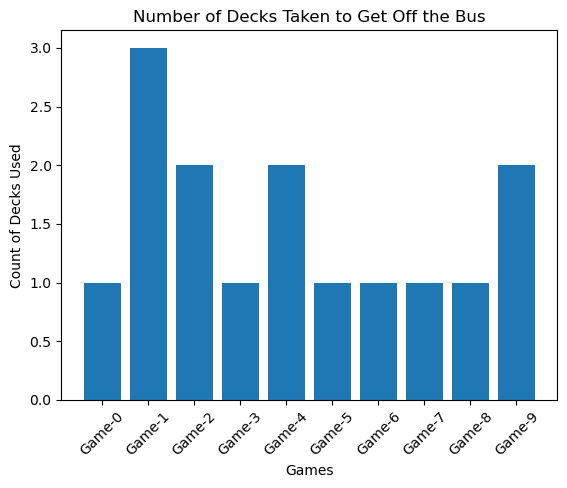

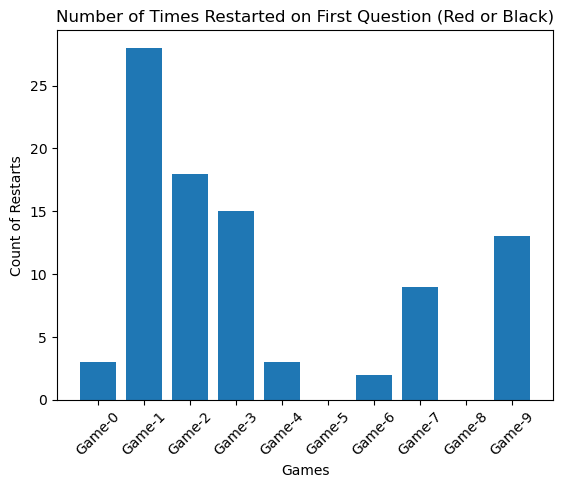

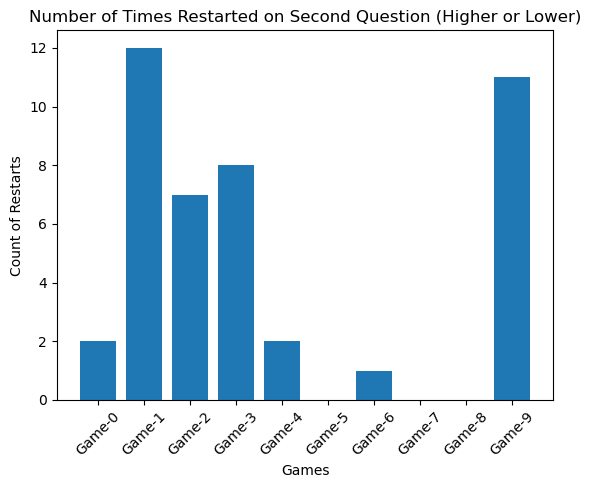

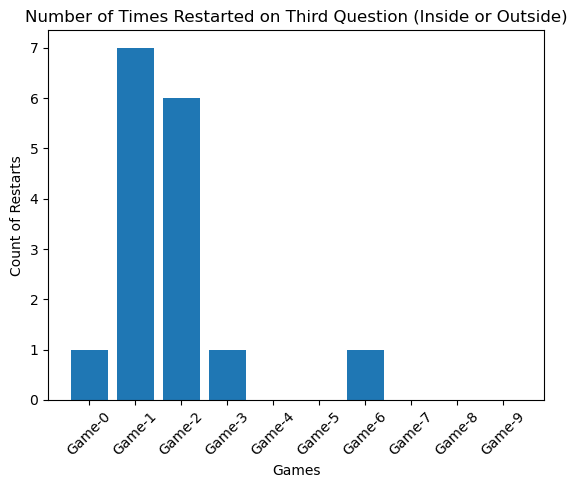

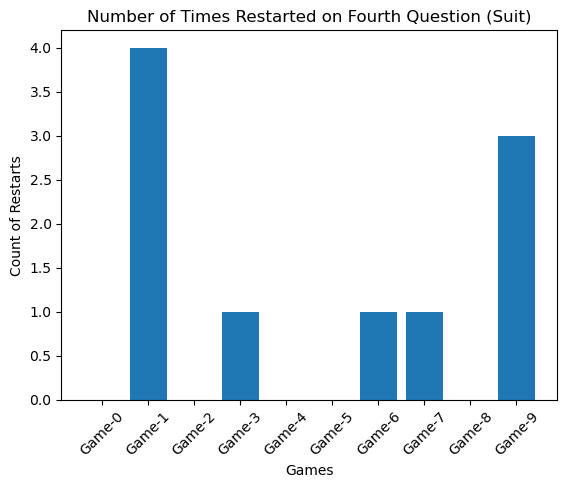

In [3]:
import matplotlib.pyplot as plt

# calculate number of games
games = []
x = 0
for x in range(10):
    games.append(f"Game-{x}")
    
# Plot number of decks used
plt.bar(games, decks_list)
plt.xticks(rotation=45)
plt.title("Number of Decks Taken to Get Off the Bus")
plt.xlabel("Games")
plt.ylabel("Count of Decks Used")
plt.show()

# Plot number of times restarted on red or black
plt.bar(games, red_or_black_list)
plt.xticks(rotation=45)
plt.title("Number of Times Restarted on First Question (Red or Black)")
plt.xlabel("Games")
plt.ylabel("Count of Restarts")
plt.show()

# Plot number of times restarted on higher or lower
plt.bar(games, higher_or_lower_list)
plt.xticks(rotation=45)
plt.title("Number of Times Restarted on Second Question (Higher or Lower)")
plt.xlabel("Games")
plt.ylabel("Count of Restarts")
plt.show()

# Plot number of times restarted on inside or outside
plt.bar(games, inside_or_outside_list)
plt.xticks(rotation=45)
plt.title("Number of Times Restarted on Third Question (Inside or Outside)")
plt.xlabel("Games")
plt.ylabel("Count of Restarts")
plt.show()

# Plot number of times restarted on suit
plt.bar(games, suit_list)
plt.xticks(rotation=45)
plt.title("Number of Times Restarted on Fourth Question (Suit)")
plt.xlabel("Games")
plt.ylabel("Count of Restarts")
plt.show()